[Reference](https://medium.com/@nomannayeem/an-end-to-end-guide-to-solving-real-world-optimization-problems-with-machine-learning-7bc959567109)

# Step 1: Optimizing Workers and Machines with Particle Swarm Optimization

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

# Synthetic Data - setting up some parameters
def operational_cost(x):
    workers, machines = x
    productivity = 1000  # target productivity
    cost_workers = 50  # cost per worker
    cost_machines = 80  # cost per machine
    penalty = 0

    # Productivity formula: assume productivity depends on both workers and machines
    actual_productivity = (workers * 10) + (machines * 20)

    # Apply penalty if productivity is lower than target
    if actual_productivity < productivity:
        penalty = (productivity - actual_productivity) * 10

    # Total cost is sum of workers, machines, and penalties for underproduction
    total_cost = (workers * cost_workers) + (machines * cost_machines) + penalty
    return total_cost

# Particle Swarm Optimization using differential evolution
bounds = [(20, 100), (10, 60)]  # Boundaries for workers and machines

# Running the optimization
result = differential_evolution(operational_cost, bounds, maxiter=1000)
optimal_workers, optimal_machines = result.x

print(f"Optimal number of workers: {int(optimal_workers)}")
print(f"Optimal number of machines: {int(optimal_machines)}")
print(f"Minimum operational cost: ${result.fun:.2f}")

Optimal number of workers: 20
Optimal number of machines: 39
Minimum operational cost: $4200.00


# Step 2: Managing Inventory with Monte Carlo Simulation

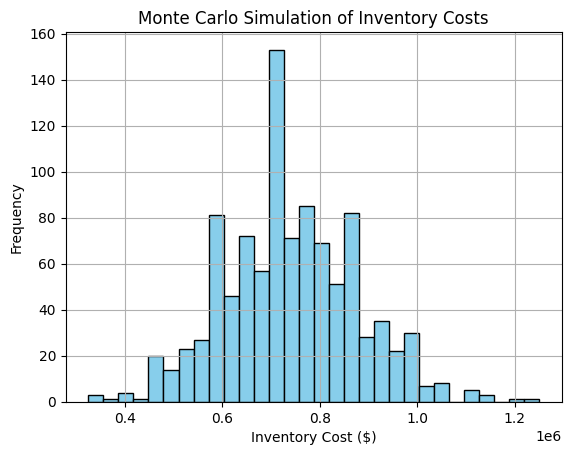

Average inventory cost from simulations: $739175.00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Monte Carlo simulation
lead_time = 4  # in weeks
cost_per_order = 25000  # Cost per order in $
num_simulations = 1000  # Number of simulations
max_shelf_time = 1.5  # Maximum shelf time for inventory in weeks
max_customer_wait_time = 21  # Maximum time customers are willing to wait (in days)

# Simulate inventory for 365 days (1 year)
days = 365
inventory_simulation = []

for _ in range(num_simulations):
    customer_wait_times = np.random.normal(loc=14, scale=5, size=days)  # Customers expect a 2-week wait time
    shelf_times = np.random.uniform(0, max_shelf_time, days)  # Random shelf time for stock

    # Calculate the number of days inventory sat on the shelf and customer wait times
    inventory_cost = (np.sum(customer_wait_times > max_customer_wait_time) * cost_per_order) + (np.sum(shelf_times > max_shelf_time) * cost_per_order)

    inventory_simulation.append(inventory_cost)

# Plot the simulation results
plt.hist(inventory_simulation, bins=30, color='skyblue', edgecolor='black')
plt.title('Monte Carlo Simulation of Inventory Costs')
plt.xlabel('Inventory Cost ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Results
mean_inventory_cost = np.mean(inventory_simulation)
print(f"Average inventory cost from simulations: ${mean_inventory_cost:.2f}")

# Step 3: Quality Control with Random Forest Classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Generate synthetic data for 1000 widgets
np.random.seed(42)
data_size = 1000
weights = np.random.uniform(50, 200, data_size)  # Random weights between 50 and 200
sizes = np.random.uniform(10, 100, data_size)    # Random sizes between 10 and 100
colors = np.random.randint(0, 2, data_size)      # Binary color feature: 0 or 1
labels = np.random.randint(0, 2, data_size)      # Binary classification: 0 (defective), 1 (good)

# Combine into a DataFrame
df = pd.DataFrame({
    'Weight': weights,
    'Size': sizes,
    'Color': colors,
    'Label': labels  # 0: defective, 1: good
})

# Split into features (X) and labels (y)
X = df[['Weight', 'Size', 'Color']]
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       148
           1       0.53      0.47      0.50       152

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300

Confusion Matrix:
[[83 65]
 [80 72]]
